
<div style="font-size: 40px; color: white;">
    <ul>
        PART I: Theory Questions 
</div>

<div style="font-size: 20px; color: white;">
    <ul>
        Question 1<br><br>
        What are activation functions, and why are they important in neural networks?
</div>


An activation function is a mathematical function applied to the output of a neuron. It introduces non-linearity into the model, allowing the network to learn and represent complex patterns in the data. 

WHY IMPORTANT?

**Without this non-linearity feature, a neural network would behave like a linear regression model, no matter how many layers it has.**

Neural networks consist of neurons that operate using weights, biases, and activation functions.
In the learning process, these weights and biases are updated based on the error produced at the output—a process known as backpropagation. Activation functions enable backpropagation by providing gradients that are essential for updating the weights and biases.

<div style="font-size: 20px; color: white;">
    <ul>
        Question 2<br><br>
        Consider the convolutional neural network defined by the layers below. Fill in the shape
of the output volume and the number of parameters at each layer.<br>
• CONV5-8: Convolutional layer with 8 filters of 5 × 5, padding is 0, stride is 1.<br>
• POOL-2: 2 × 2 max-pooling layer, stride is 2.<br>
• CONV3-16: Convolutional layer with 16 filters of 3 × 3, padding is 0, stride is 1.<br>
• POOL-3: 3 × 3 max-pooling layer, stride is 2.<br>
• FC-30: Fully connected layer with 30 neurons.<br>
• FC-5: Fully connected layer with 5 neurons.<br>
• Input: 64 × 64 × 3.

</div>


Solution:

Formula for output size: [(W−K+2P)/S]+1

Formula for parameter calculation: Parameters=(K×K×Input depth+1)×Number of filters


Input size: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(64,64,3)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Number Of Parameters: 0<br>
after CONV5-8: &nbsp;&nbsp;&nbsp;(60,60,8)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;608<br>
after POOL-2:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(30,30,8)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0<br>
after CONV3-16: (28,28,16)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1168<br>
after POOL-3: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(14,14,16)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0<br>
after FC-30:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(30)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;94,110<br>
after FC-5: &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;(5)&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;155



<div style="font-size: 40px; color: white;">
    <ul>
        PART II: Classification of Skin Lesion Images using Neural Network 
</div>

This project involves implementing and experimenting with both Multi-Layer Perceptron (MLP) and Convolutional Neural Network (CNN) models for a binary classification task. Below is a detailed explanation of each step and the corresponding implementation choices.

In [1]:
# Importing necessary libraries.
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [43]:
print(torch.__version__)

2.5.1+cu118



<div style="font-size: 20px; color: white;">
    <ul>
        Checking for Cuda's availibility to run the program faster.<br>
        Also printing the gpu's name for checking if the torch can see my gpu.
</div>

In [44]:
print(torch.cuda.is_available())  # It will be true if gpu is usable
print(torch.cuda.get_device_name(0))

True
NVIDIA GeForce RTX 3050 Ti Laptop GPU


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## **Dataset Preparation**

In [46]:
transform = transforms.Compose([
    transforms.Resize((300, 300)),  # Reshaping as it asked
    transforms.ToTensor(),  # Transform it to tensor format
    transforms.Normalize((0.5,), (0.5,))  # Normalization
])

In [47]:
# Loading the data
train_dataset = datasets.ImageFolder(root="311PA3_melanoma_dataset/train", transform=transform)
test_dataset = datasets.ImageFolder(root="311PA3_melanoma_dataset/test", transform=transform)

In [48]:
batch_sizes = [16, 32]  # Batch sizes to try.
train_loader = {batch_size: DataLoader(train_dataset, batch_size=batch_size, shuffle=True) for batch_size in batch_sizes}
test_loader = {batch_size: DataLoader(test_dataset, batch_size=batch_size, shuffle=False) for batch_size in batch_sizes}


Checking the set sizes to see if they are succesfully loaded.

In [49]:
print(f"Training set size: {len(train_dataset)}")
print(f"Test set size: {len(test_dataset)}")
print(f"Total set size: {len(test_dataset)+len(train_dataset)}")

Training set size: 7684
Test set size: 1921
Total set size: 9605


In [50]:
# Getting the example image
example_image, label = train_dataset[0]

print(f"Label: {label}")
print(f"Image shape: {example_image.shape}")

Label: 0
Image shape: torch.Size([3, 300, 300])


Plotting the example image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


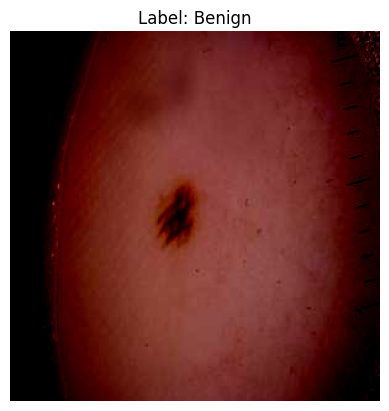

In [51]:
plt.imshow(np.transpose(example_image.numpy(), (1, 2, 0)), cmap='gray')
plt.title(f"Label: {'Malignant' if label == 1 else 'Benign'}")
plt.axis('off')
plt.show()

## **Convolutional Neural Network(CNN) Implementation**

### **Model Architecture:**
- The CNN model consists of **2 convolutional layers**, followed by **max pooling**, and **2 fully connected layers**.
- Each convolutional layer uses ReLU or Sigmoid activation functions, depending on the experiment.

### **Why This Architecture?**
- Convolutional layers extract spatial features from the images.
- Max pooling reduces the spatial dimensions, making the model computationally efficient.
- Fully connected layers act as a classifier to output the probability of each class.

### **Experiments Conducted:**
- A total of **8 experiments** were conducted with combinations of:
  - Batch sizes (`16`, `32`)
  - Learning rate (`0.005`, `0.02`)
  - Activation function (`ReLU`, `Sigmoid`)


### Convolutional Layers and Max Pooling

- **Convolution Layer 1**:
  Applies 16 filters of size **3x3** on the RGB input (3 channels). 
  The mathematical operation is:
  $$
  z_{ij} = \sum_{c=1}^{C} \sum_{k=1}^{K} \sum_{l=1}^{K} x_{i+k, j+l, c} \cdot w_{k, l, c} + b
  $$
  where $$x$$ is the input, $$w$$ is the filter, $$b$$ is the bias, $$C$$ is the number of input channels, and $$K$$ is the kernel size.<br><br>

- **Convolution Layer 2**:
  Applies 32 filters of size 3x3 to the output of Conv1.
  Similar to Conv1, it captures more complex patterns and relationships from the feature maps.<br><br>

- **Max Pooling**:
  Reduces spatial dimensions by selecting the maximum value in each $$2 \times 2$$ region.
  This reduces computational complexity and helps extract dominant features from the feature map.
  Output size formula for pooling:
  $$
  \text{Output size} = \left\lfloor \frac{\text{Input size}}{\text{stride}} \right\rfloor
  $$
  where stride is the step size of the pooling window.


In [ ]:
# CNN class with 2 convolutional layers, max pooling, and 2 fully connected layers
class CNN(nn.Module):
    def __init__(self, activation_fn=nn.ReLU()):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)  # 3 channels -> 16 filters
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  # 16 filters -> 32 filters
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 75 * 75, 512)  # FC layer 
        self.fc2 = nn.Linear(512, 1)  # Output 1 neuron (binary classification with sigmoid)
        self.activation_fn = activation_fn
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.pool(self.activation_fn(self.conv1(x)))
        x = self.pool(self.activation_fn(self.conv2(x)))
        x = x.view(-1, 32 * 75 * 75)  # Flattening
        x = self.activation_fn(self.fc1(x))
        x = self.sigmoid(self.fc2(x))  # Output is a sigmoid function.
        return x


### Backpropagation and Gradient Descent

- **Backpropagation**:
  Computes gradients of the loss with respect to model parameters using the chain rule of derivatives:
  $$
  \frac{\partial \mathcal{L}}{\partial w} = \frac{\partial \mathcal{L}}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w}
  $$
  Here:
  - \( L \): Loss
  - \( w \): Parameter (weights or biases)
  - \( a \): Activated output
  - \( z \): Linear transformation output

- **Gradient Descent**:
  Updates model parameters to minimize the loss:
  $$
  w_{\text{new}} = w_{\text{old}} - \eta \cdot \frac{\partial \mathcal{L}}{\partial w}
  $$
   where \( n \) is the learning rate.


In [ ]:
def train_test(learning_rate, batch_size, activation_fn):
    model = CNN(activation_fn=activation_fn)
    model.to(device)  # Transfer the model to the GPU for higher process speed.
    criterion = nn.BCELoss()  # Binary cross-entropy loss
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    train_loader_instance = train_loader[batch_size]
    test_loader_instance = test_loader[batch_size]

    # Training for 10 epochs
    for epoch in range(10):  
        model.train()
        for images, labels in train_loader_instance:
            images, labels = images.to(device), labels.to(device)  # Transfer data to the GPU
            labels = labels.float().unsqueeze(1) 
            optimizer.zero_grad() # Reset gradients (residue from previous batch are cleared)
            outputs = model(images) # Forward pass
            loss = criterion(outputs, labels) # Loss calculation for backpropagation
            loss.backward() # Backpropagation
            optimizer.step() # Updating parameters with using Gradient descent 
    
    # Testing the model 
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for images, labels in test_loader_instance:
            images, labels = images.to(device), labels.to(device)  # Transfer data to the GPU
            labels = labels.float().unsqueeze(1)  # Reshape labels to [batch_size, 1]
            outputs = model(images)
            outputs = outputs.squeeze(1)  # Flatten [batch_size, 1] to [batch_size]
            predictions = (outputs > 0.5).float()  # Threshold for sigmoid output
            all_labels.extend(labels.cpu().numpy())  # Transfer data back to CPU and convert to numpy array
            all_predictions.extend(predictions.cpu().numpy())  # Transfer data back to CPU and convert to numpy array

    # Calculate performance metrics
    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions, zero_division=0)
    recall = recall_score(all_labels, all_predictions, zero_division=0)
    f1 = f1_score(all_labels, all_predictions, zero_division=0)

    # Calculate confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)

    # Print the results
    print(f"Results for LR: {learning_rate}, Batch size: {batch_size}, Activation function: {activation_fn.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)


In [ ]:
# 
learning_rates = [0.005, 0.02]  # Learning rates to try
activation_functions = [nn.ReLU(), nn.Sigmoid()]  # Activation functions to try
for lr in learning_rates:  # Iterate over all posibilities. (8 experiment)
    for batch_size in batch_sizes:
        for activation_fn in activation_functions:
            train_test(lr, batch_size, activation_fn)

Results for LR: 0.005, Batch size: 16, Activation function: ReLU
Accuracy: 0.4794
Precision: 0.4794
Recall: 1.0000
F1 Score: 0.6481
Confusion Matrix:
[[   0 1000]
 [   0  921]]
Results for LR: 0.005, Batch size: 16, Activation function: Sigmoid
Accuracy: 0.4794
Precision: 0.4794
Recall: 1.0000
F1 Score: 0.6481
Confusion Matrix:
[[   0 1000]
 [   0  921]]
Results for LR: 0.005, Batch size: 32, Activation function: ReLU
Accuracy: 0.4794
Precision: 0.4794
Recall: 1.0000
F1 Score: 0.6481
Confusion Matrix:
[[   0 1000]
 [   0  921]]
Results for LR: 0.005, Batch size: 32, Activation function: Sigmoid
Accuracy: 0.5206
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
Confusion Matrix:
[[1000    0]
 [ 921    0]]
Results for LR: 0.02, Batch size: 16, Activation function: ReLU
Accuracy: 0.4794
Precision: 0.4794
Recall: 1.0000
F1 Score: 0.6481
Confusion Matrix:
[[   0 1000]
 [   0  921]]
Results for LR: 0.02, Batch size: 16, Activation function: Sigmoid
Accuracy: 0.4794
Precision: 0.4794
Recall: 

In [3]:
# For GPU usage
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## **Multi-Layer Perceptron (MLP) Implementation**



### **Model Architecture:**
- Input Layer: Flattened images of size `50x50` or `300x300`.
- Hidden Layers:
  - First Layer: 128 neurons
  - Second Layer: 64 neurons
- Output Layer: 1 neuron (for binary classification)
- Activation Functions: ReLU and Sigmoid.

### **Why This Architecture?**
- The two hidden layers provide sufficient capacity to model complex relationships in the data.
- Binary classification requires a single output neuron with a Sigmoid activation function for probability outputs.


### **Experiments Conducted:**
- A total of **8 experiments** were conducted with combinations of:
  - Input size (`50x50`, `300x300`)
  - Learning rate (`0.005`, `0.02`)
  - Activation function (`ReLU`, `Sigmoid`)


Defining a class for creating our MultiLayer Neural Network model.

### Fully Connected Layers in MLP

- **Fully Connected Layer**:
  Performs a linear transformation followed by an activation function:
  \[
  z = Wx + b, a = activation(z)
  \]
  Here:
  - \( W \): Weights matrix
  - \( x \): Input vector
  - \( b \): Bias vector
  - \( a \): Activated output

- **Activation Functions**:
  - **ReLU**: Replaces negative values with zero. Mathematically:
    \[
    ReLU(x)=max(0,x)
    \]
  - **Sigmoid**: Maps values to the range \([0, 1]\). 
    \[
    \]
    Often used for binary classification to represent probabilities.

    Mathematically:


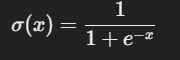

In [4]:
# MLP class with 3 fully connected layers
class MultiLayerNN(nn.Module):
    def __init__(self, input_size, activation_fn=nn.ReLU()):
        super(MultiLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Input size -> 128 neurons
        self.fc2 = nn.Linear(128, 64)          # 128 neurons -> 64 neurons
        self.fc3 = nn.Linear(64, 1)            # 64 neurons -> 1 output neuron
        self.activation = activation_fn
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.sigmoid(self.fc3(x))  # Output is a sigmoid function for binary classification
        return x

### Backpropagation and Gradient Descent

- **Backpropagation**:
  Computes gradients of the loss with respect to model parameters using the chain rule of derivatives:
  $$
  \frac{\partial \mathcal{L}}{\partial w} = \frac{\partial \mathcal{L}}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial w}
  $$
  Here:
  - \( L \): Loss
  - \( w \): Parameter (weights or biases)
  - \( a \): Activated output
  - \( z \): Linear transformation output

- **Gradient Descent**:
  Updates model parameters to minimize the loss:
  $$
  w_{\text{new}} = w_{\text{old}} - \eta \cdot \frac{\partial \mathcal{L}}{\partial w}
  $$
   where \( n \) is the learning rate.


Will use the same type of code for training as CNN(When I wanted to create the train part, I copy pasted the code cell from CNN part and then made changes.)

In [ ]:
# Training Function
def train_model(model, train_loader, test_loader, lr, epochs):
    criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        for images, labels in train_loader:
            # Flatten the images
            images = images.view(images.size(0), -1)  # (batch_size, input_size)
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)  # Transfer to GPU
 
            optimizer.zero_grad() # Reset gradients (residue from previous batch are cleared)
            outputs = model(images) # Forward pass
            loss = criterion(outputs, labels) # Loss calculation for backpropagation
            loss.backward() # Backpropagation
            optimizer.step() # Updating parameters with using Gradient descent 

    # Validation after the last epoch
    model.eval()
    with torch.no_grad():
        all_labels = []
        all_predictions = []
        for images, labels in test_loader:
            images = images.view(images.size(0), -1)
            images, labels = images.to(device), labels.to(device).float().unsqueeze(1)
            outputs = model(images)
            predictions = (outputs > 0.5).float()  # Convert predictions to class labels
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

        # Calculate performance metrics
        accuracy = accuracy_score(all_labels, all_predictions)
        precision = precision_score(all_labels, all_predictions, zero_division=0)
        recall = recall_score(all_labels, all_predictions, zero_division=0)
        f1 = f1_score(all_labels, all_predictions, zero_division=0)

    # Calculate confusion matrix
    cm = confusion_matrix(all_labels, all_predictions)

    # Print the results
    print(f"Final Results (Learning Rate: {lr}, Activation: {model.activation.__class__.__name__})")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(cm)


Defining the parameters to try. Will use this part at itearating over all posibilities to try 8 different\
experiments(2 Input Size X 2 Learning Rate X 2 Activation Function = 8 experiment)

In [6]:
# Parameters
input_sizes = [50 * 50 * 3, 300 * 300 * 3]  # 50x50 and 300x300 input sizes
learning_rates = [0.005, 0.02]
batch_size = 16
activation_functions = [nn.ReLU(), nn.Sigmoid()]
epochs = 10  # Epoch number

Transforming the images as needed shapes(size, normalization etc.)

In [7]:
# For transform process. (for both input sizes)
transform_small = transforms.Compose([
    transforms.Resize((50, 50)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

transform_large = transforms.Compose([
    transforms.Resize((300, 300)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

Loading the data

In [8]:
# Loading the data
train_dataset_small = datasets.ImageFolder(root="311PA3_melanoma_dataset/train", transform=transform_small)
test_dataset_small = datasets.ImageFolder(root="311PA3_melanoma_dataset/test", transform=transform_small)

train_dataset_large = datasets.ImageFolder(root="311PA3_melanoma_dataset/train", transform=transform_large)
test_dataset_large = datasets.ImageFolder(root="311PA3_melanoma_dataset/test", transform=transform_large)


Defining the loaders.

In [9]:
# Defining the loaders.
train_loaders = {
    50 * 50 * 3: DataLoader(train_dataset_small, batch_size=batch_size, shuffle=True),
    300 * 300 * 3: DataLoader(train_dataset_large, batch_size=batch_size, shuffle=True)
}
test_loaders = {
    50 * 50 * 3: DataLoader(test_dataset_small, batch_size=batch_size, shuffle=False),
    300 * 300 * 3: DataLoader(test_dataset_large, batch_size=batch_size, shuffle=False)
}


<div style="font-size: 20px; color: white;">
    <ul>
        Training and testing the output for all combinations.
</div>



<div style="font-size: 20px; color: white;">
    <ul>
        image_size = int((input_size / 3) ** 0.5) <br>
        Because, consider our image size 50x50x3; to get this as 50(we want to print it,) first divide it by 3 and you now have 50x50 size, then getting the square root of it will five your result as 50.
</div>

In [10]:
# Training and testing the output for all combinations.
for input_size in input_sizes:
    for lr in learning_rates:
        for activation_fn in activation_functions:
            image_size = int((input_size / 3) ** 0.5)
            print(f"\nTraining with Input Size: {image_size}x{image_size}, Learning Rate: {lr}, Activation: {activation_fn.__class__.__name__}")
            model = MultiLayerNN(input_size=input_size, activation_fn=activation_fn).to(device)
            train_loader = train_loaders[input_size]
            test_loader = test_loaders[input_size]
            train_model(model, train_loader, test_loader, lr=lr, epochs=epochs)


Training with Input Size: 50x50, Learning Rate: 0.005, Activation: ReLU
Final Results (Learning Rate: 0.005, Activation: ReLU)
Accuracy: 0.9001
Precision: 0.9137
Recall: 0.8740
F1 Score: 0.8935
Confusion Matrix:
[[924  76]
 [116 805]]

Training with Input Size: 50x50, Learning Rate: 0.005, Activation: Sigmoid
Final Results (Learning Rate: 0.005, Activation: Sigmoid)
Accuracy: 0.8522
Precision: 0.9357
Recall: 0.7427
F1 Score: 0.8281
Confusion Matrix:
[[953  47]
 [237 684]]

Training with Input Size: 50x50, Learning Rate: 0.02, Activation: ReLU
Final Results (Learning Rate: 0.02, Activation: ReLU)
Accuracy: 0.4794
Precision: 0.4794
Recall: 1.0000
F1 Score: 0.6481
Confusion Matrix:
[[   0 1000]
 [   0  921]]

Training with Input Size: 50x50, Learning Rate: 0.02, Activation: Sigmoid
Final Results (Learning Rate: 0.02, Activation: Sigmoid)
Accuracy: 0.8090
Precision: 0.8968
Recall: 0.6797
F1 Score: 0.7733
Confusion Matrix:
[[928  72]
 [295 626]]

Training with Input Size: 300x300, Learning


<div style="font-size: 50px; color: white;">
    <ul>
        Evaluating The Results 
</div>

## **Results For CNN (Part 1)**

| Input Size | Learning Rate | Batch Size | Activation       | Accuracy | Precision | Recall | F1 Score |
|------------|---------------|------------|------------------|----------|-----------|--------|----------|
| 300x300    | 0.005         | 16         | ReLU             | 0.4794   | 0.4794    | 1.0000 | 0.6481   |
| 300x300    | 0.005         | 16         | Sigmoid          | 0.4794   | 0.4794    | 1.0000 | 0.6481   |
| 300x300    | 0.005         | 32         | ReLU             | 0.4794   | 0.4794    | 1.0000 | 0.6481   |
| 300x300    | 0.005         | 32         | Sigmoid          | 0.5206   | 0.0000    | 0.0000 | 0.0000   |
| 300x300    | 0.02          | 16         | ReLU             | 0.4794   | 0.4794    | 1.0000 | 0.6481   |
| 300x300    | 0.02          | 16         | Sigmoid          | 0.4794   | 0.4794    | 1.0000 | 0.6481   |
| 300x300    | 0.02          | 32         | ReLU             | 0.5206   | 0.0000    | 0.0000 | 0.0000   |
| 300x300    | 0.02          | 32         | Sigmoid          | 0.5206   | 0.0000    | 0.0000 | 0.0000   |



<div style="font-size: 20px; color: white;">
    <ul>
        In this part, I got unexpected result because the model classifies all data as benign or malignant. At first, I was worried that I did something wrong but, then I talked my other friends and saw that they are getting similar results too. Also the calculation time for this part took way too long(almost 8 hours). Results were disappointing.
</div>        

## **Results For MLP (Part 2)**

| Input Size | Learning Rate | Batch Size | Activation | Accuracy | Precision | Recall | F1 Score |
|------------|---------------|------------|------------|----------|-----------|--------|----------|
| 50x50      | 0.005         | 16         | ReLU       | 0.9001   | 0.9137    | 0.8740 | 0.8935   |
| 50x50      | 0.005         | 16         | Sigmoid    | 0.8522   | 0.9357    | 0.7427 | 0.8281   |
| 50x50      | 0.02          | 16         | ReLU       | 0.4794   | 0.4794    | 1.0000 | 0.6481   |
| 50x50      | 0.02          | 16         | Sigmoid    | 0.8090   | 0.8968    | 0.6797 | 0.7733   |
| 300x300    | 0.005         | 16         | ReLU       | 0.4794   | 0.4794    | 1.0000 | 0.6481   |
| 300x300    | 0.005         | 16         | Sigmoid    | 0.8011   | 0.8801    | 0.6775 | 0.7656   |
| 300x300    | 0.02          | 16         | ReLU       | 0.5206   | 0.0000    | 0.0000 | 0.0000   |
| 300x300    | 0.02          | 16         | Sigmoid    | 0.7631   | 0.9396    | 0.5407 | 0.6864   |



<div style="font-size: 20px; color: white;">
    <ul>
        <li>In this part, I got the expected results although we have some experiments that I got the same problem as CNN part(50x50,0.02, 16,ReLU). 
        <li> If we want to build a image classification model for predicting an skin lesion image, we can say that we should use the Input size: 50x50, LR: 0.005, Batch Size: 16, ReLU model with accuracy 90% because of it is more useful than other combinations and other models.
        <li> Also the training time for this part is really fast compared to CNN(almost 14 minutes.)
</div>        